In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/proj/som


In [3]:
import torch
from som import som_learner, UnsupervisedDataset, SomInterpretation, SomStatsVisualizer

In [4]:
from torch import Tensor
from sklearn.datasets import load_iris
from typing import Tuple
from itertools import combinations_with_replacement

def iris() -> Tuple[Tensor]:
    "Loads the IRIS dataset into two tensors."
    iris = load_iris()
    x = torch.tensor(iris.data)
    y = torch.tensor(iris.target)
    
    return x, y
    
def colors(n: int = 500) -> Tuple[Tensor]:
    "Loads a dataset containing all possible RGB color combinations"
    return torch.FloatTensor(n, 3).uniform_(0, 255).long().float(), None

def uniform(n: int = 10000, s: int = 10) -> Tuple[Tensor]:
    "Loads a uniform dataset"
    return torch.randn(n, s), None
    

In [5]:
x, y = iris()
map_size = (4, 4)

In [6]:
x.shape

torch.Size([150, 4])

In [7]:
size = (map_size[0], map_size[1], x.shape[-1])
size

(4, 4, 4)

In [8]:
def pct_split(x: Tensor, pct: float = 0.2):
    sep = int(x.shape[0] * (1 - pct))
    return x[:sep], x[sep:]

In [9]:
x_train, x_valid = pct_split(x)

In [10]:
ud = UnsupervisedDataset.create(train=x_train, valid=x_valid, bs=10, norm=True)

In [27]:
learn = som_learner(ud, map_size=map_size, init='random')

In [30]:
learn.model.weights[0][0]

tensor([-3.9111e+202, -6.7265e+202,  8.0012e+201,  1.0997e+202],
       device='cuda:0', dtype=torch.float64)

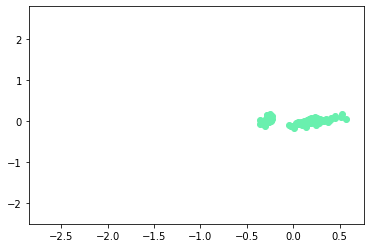

In [29]:
learn.fit(10, visualize_dim=2, visualize=True)

In [31]:
interp = SomInterpretation.from_learner(learn)

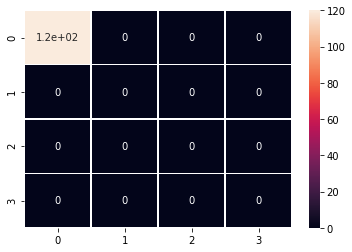

In [32]:
%matplotlib inline
interp.show_hitmap()

/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:454: RuntimeWarning: overflow encountered in square
  explained_variance_ = (S ** 2) / (n_samples - 1)
/opt/conda/lib/python3.6/site-packages/sklearn/decomposition/_pca.py:456: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


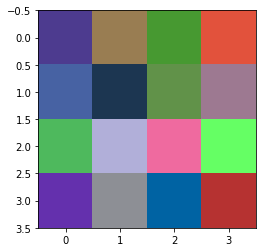

In [33]:
interp.show_omni_heatmap()

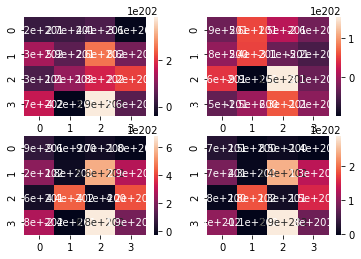

In [26]:
interp.show_heatmap()

In [ ]:
def pwd(x, y):
    n = x.size(0)
    m = y.size(0)
    d = x.size(1)

    x = x.unsqueeze(1).expand(n, m, d)
    y = y.unsqueeze(0).expand(n, m, d)
    return torch.pow(x - y, 2).sum(2) 

## TODO

- Get the BMU of each node
- Associate the BMU to its weight vector
- Calculate difference of each input value and its BMU weight
- Calculate variance of each cluster